In [1]:
import pandas as pd

In [2]:

import yfinance as yf
from datetime import date

# get daily price TS from yahoo fin 
start_time = date.fromisoformat('2019-10-01')
end_time = date.fromisoformat('2019-11-30')

# 1.2 Importing gold ETF prices (GLD) for 10/19 and 11/19 
gld_df = yf.download('GLD', start_time, end_time, auto_adjust=True)
series_gld = gld_df[['Close']]


[*********************100%***********************]  1 of 1 completed


In [25]:
# 1.3 Importing equity ETF prices 10/19 and 11/19
mchi_df = yf.download('MCHI', start_time, end_time, auto_adjust=True)
mchi_series = mchi_df[['Close']]

[*********************100%***********************]  1 of 1 completed


In [3]:
import pandas_datareader as pdr

# 1.1 Import closing daily interest rates for 6 active US Treasury yield benchmarks (2yr, 3yr, 5yr, 7yr, 10yr, 30yr) from FRED
dgs10 = pdr.get_data_fred('DGS10')
dgs30 = pdr.get_data_fred('DGS30')
dgs7 = pdr.get_data_fred('DGS7')
dgs5 = pdr.get_data_fred('DGS5')
dgs3 = pdr.get_data_fred('DGS3')
dgs2 = pdr.get_data_fred('DGS2')


In [16]:
benchmark_secs = dgs10.merge(dgs30,on='DATE').merge(dgs7,on='DATE').merge(dgs5,on='DATE').merge(dgs3,on='DATE').merge(dgs2,on='DATE').dropna()
benchmark_secs.head

<bound method NDFrame.head of             DGS10  DGS30  DGS7  DGS5  DGS3  DGS2
DATE                                            
2016-01-14   2.10   2.90  1.87  1.52  1.14  0.90
2016-01-15   2.03   2.81  1.79  1.46  1.08  0.85
2016-01-19   2.06   2.82  1.82  1.49  1.11  0.88
2016-01-20   2.01   2.77  1.76  1.44  1.06  0.85
2016-01-21   2.02   2.79  1.77  1.44  1.06  0.84
...           ...    ...   ...   ...   ...   ...
2021-01-04   0.93   1.66  0.64  0.36  0.16  0.11
2021-01-05   0.96   1.70  0.66  0.38  0.17  0.13
2021-01-06   1.04   1.81  0.74  0.43  0.20  0.14
2021-01-07   1.08   1.85  0.78  0.46  0.22  0.14
2021-01-08   1.13   1.87  0.81  0.49  0.24  0.14

[1247 rows x 6 columns]>

In [17]:
# 3.1 Avg yield for each benchmark security for October
benchmark_secs['2019-10-01':'2019-10-31'].mean(axis=0)

DGS10    1.706818
DGS30    2.190455
DGS7     1.615000
DGS5     1.525000
DGS3     1.528182
DGS2     1.551364
dtype: float64

In [15]:
# 3.1 Avg yield for each benchmark security for November
benchmark_secs['2019-11-01':'2019-11-30'].mean(axis=0)

DGS10    1.812105
DGS30    2.280526
DGS7     1.735789
DGS5     1.639474
DGS3     1.612105
DGS2     1.612632
dtype: float64

In [21]:
# 3.2 For the month of October, compute the average price the Gold ETF. 
series_gld['2019-10-01':'2019-10-31'].mean()

Close    140.874782
dtype: float64

In [22]:
# 3.2  Repeat the average calculation for November.
series_gld['2019-11-01':'2019-11-30'].mean()

Close    138.570499
dtype: float64

In [26]:
# 3.3 For the month of October, compute the average price the Equity ETF. 
mchi_series['2019-10-01':'2019-10-31'].mean()

Close    56.425028
dtype: float64

In [27]:
# 3.3  Repeat the average calculation for November.
mchi_series['2019-11-01':'2019-11-30'].mean()

Close    58.789387
dtype: float64

In [28]:
# 3.4 For the month of October, compute the standard deviation for each benchmark security. 
benchmark_secs['2019-10-01':'2019-10-31'].std(axis=0)

DGS10    0.104808
DGS30    0.101300
DGS7     0.100653
DGS5     0.104460
DGS3     0.096443
DGS2     0.080315
dtype: float64

In [29]:
# 3.4  Repeat the average calculation for November.
benchmark_secs['2019-11-01':'2019-11-30'].std(axis=0)

DGS10    0.065028
DGS30    0.076918
DGS7     0.061039
DGS5     0.052755
DGS3     0.044043
DGS2     0.033804
dtype: float64

In [30]:
# 3.5 For the month of October, compute the standard deviation of the Gold ETF. 
series_gld['2019-10-01':'2019-10-31'].std()

Close    0.831229
dtype: float64

In [31]:
# 3.5  Repeat the average calculation for November.
series_gld['2019-11-01':'2019-11-30'].std()

Close    1.562095
dtype: float64

In [32]:
# 3.6 For the month of October, compute the standard deviation of the Equity ETF.
mchi_series['2019-10-01':'2019-10-31'].std()

Close    1.119073
dtype: float64

In [33]:
# 3.6   Repeat the average calculation for November.
mchi_series['2019-11-01':'2019-11-30'].std()

Close    0.727089
dtype: float64

<AxesSubplot:xlabel='DATE'>

<Figure size 432x288 with 0 Axes>

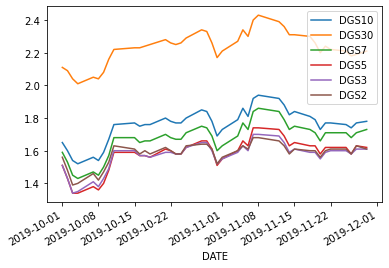

In [35]:
# 4.1 Graph the 6 benchmark securities for the 2 months on 1 plot.  That means the 6 yield series are overlaid on the same area.  Add a legend
import matplotlib.pyplot as plt
plt.figure()

benchmark_secs['2019-10-01':'2019-11-30'].plot()

<AxesSubplot:xlabel='Date'>

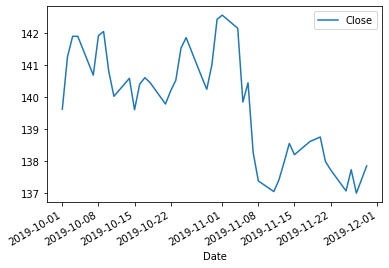

In [36]:
# 4.2 On a separate graph, plot the gold ETF prices (not returns!) for the 2 months.  Use the left-side axis for the price label
series_gld['2019-10-01':'2019-11-30'].plot()

<AxesSubplot:xlabel='Date'>

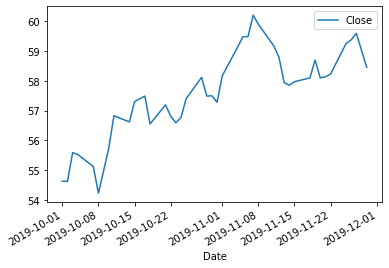

In [37]:
# 4.3 On the same graph, plot the equity ETF prices (not returns!) for the 2 months.  Be sure to use a separate scale, and the right-side axis for the price label
mchi_series['2019-10-01':'2019-11-30'].plot()

In [40]:
# 5.1 Use either Nelson-Siegel, or Nelson-Siegel-Svensson to fit the Yield Curve.  Write out the equation.

import pyesg
import numpy as np
maturities = np.array([, 3, 5, 7, 10, 30])



array([0.93, 1.65, 0.65, 0.36, 0.17, 0.13])

In [63]:
# 5.2 Fit the yield curve each day using the 6 benchmark yields for the October data
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

for day,row in benchmark_secs['2019-10-01':'2019-10-31'].iterrows():
    yield_day = row.values
    curve, status = calibrate_ns_ols(maturities, yield_day, tau0=1.0)  # starting value of 1.0 for the optimization of tau
    print(day, curve)

2019-10-01 00:00:00 NelsonSiegelCurve(beta0=1.3436424071008464, beta1=-27224928.42940016, beta2=27224945.347783618, tau=0.11403986978878111)
2019-10-02 00:00:00 NelsonSiegelCurve(beta0=1.2449549124839254, beta1=-38087159.26793888, beta2=38087178.333689824, tau=0.11243266044741296)
2019-10-03 00:00:00 NelsonSiegelCurve(beta0=1.142235584993699, beta1=-117383204.62059471, beta2=117383226.1765281, tau=0.10595221066221511)
2019-10-04 00:00:00 NelsonSiegelCurve(beta0=1.1607527561053228, beta1=-50514969.24436089, beta2=50514988.52692326, tau=0.11059176083093393)
2019-10-07 00:00:00 NelsonSiegelCurve(beta0=1.2207171323873505, beta1=-67818298.19165088, beta2=67818317.13410388, tau=0.10867546930374807)
2019-10-08 00:00:00 NelsonSiegelCurve(beta0=1.1811119031910322, beta1=-226483.05032568017, beta2=226496.69936783225, tau=0.1579721141303133)
2019-10-09 00:00:00 NelsonSiegelCurve(beta0=1.2319178135099926, beta1=-256148.22280419103, beta2=256161.8350926534, tau=0.1562095934424962)
2019-10-10 00:00:

In [66]:
# 5.3 Fit the yield curve each day using the 6 benchmark yields for the November data

for day,row in benchmark_secs['2019-11-01':'2019-11-30'].iterrows():
    yield_day = row.values
    curve, status = calibrate_ns_ols(maturities, row, tau0=1.0)  # starting value of 1.0 for the optimization of tau
    print(day, curve)

2019-11-01 00:00:00 NelsonSiegelCurve(beta0=1.3389640365191475, beta1=-203484.61361559966, beta2=203498.61050730752, tau=0.15941514199529072)


LinAlgError: SVD did not converge in Linear Least Squares

In [67]:
print(benchmark_secs['2019-11-01':'2019-11-30'])

            DGS10  DGS30  DGS7  DGS5  DGS3  DGS2
DATE                                            
2019-11-01   1.73   2.21  1.63  1.55  1.55  1.56
2019-11-04   1.79   2.27  1.69  1.60  1.59  1.60
2019-11-05   1.86   2.34  1.77  1.66  1.63  1.63
2019-11-06   1.81   2.30  1.73  1.63  1.60  1.61
2019-11-07   1.92   2.40  1.84  1.74  1.70  1.68
2019-11-08   1.94   2.43  1.86  1.74  1.70  1.68
2019-11-12   1.92   2.39  1.84  1.73  1.69  1.66
2019-11-13   1.88   2.36  1.79  1.69  1.65  1.63
2019-11-14   1.82   2.31  1.73  1.63  1.59  1.58
2019-11-15   1.84   2.31  1.75  1.65  1.61  1.61
2019-11-18   1.81   2.30  1.73  1.63  1.59  1.60
2019-11-19   1.79   2.26  1.71  1.63  1.59  1.60
2019-11-20   1.73   2.20  1.66  1.58  1.55  1.56
2019-11-21   1.77   2.24  1.71  1.62  1.59  1.60
2019-11-22   1.77   2.22  1.71  1.62  1.60  1.61
2019-11-25   1.76   2.21  1.71  1.62  1.60  1.61
2019-11-26   1.74   2.18  1.68  1.58  1.58  1.58
2019-11-27   1.77   2.19  1.71  1.63  1.61  1.63
2019-11-29   1.78   